# What is Multicollinearlity
# How to detect it
# How to solve it

In [66]:
import pandas as pd

# load dataset
df = pd.read_csv('Car_sales.csv')


In [67]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


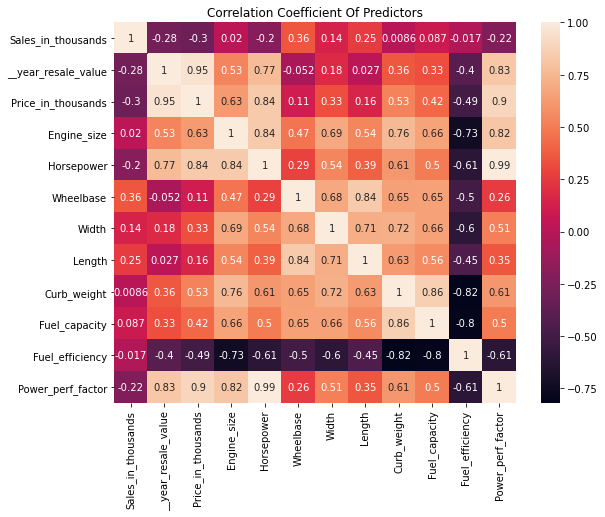

In [68]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set figure size
plt.figure(figsize=(9,7))

# Generate a mask to onlyshow the bottom triangle
# mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

# #From the heatmap, we can identify strong relationships between:

Power_perf_factor and Horsepower

Fuel_efficiency and Engine_size

Fuel_efficiency and Curb_weight

Fuel_efficiency and Fuel_capacity

In [70]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
   
    X=X.dropna()
#     print(X.isna().sum())
    v=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     print(v)
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [72]:
# features to consider removing
considered_features = ['Fuel_efficiency', 'Power_perf_factor', 'Engine_size', 'Horsepower', 'Fuel_capacity', 'Curb_weight']


# compute vif 
compute_vif(considered_features)

<ipython-input-70-d2066ffe3505>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,Fuel_efficiency,3.820887
1,Power_perf_factor,80.453249
2,Engine_size,5.694247
3,Horsepower,90.075189
4,Fuel_capacity,4.543259
5,Curb_weight,5.793651


# In this scenario, a VIF greater or equal to 5 will be deemed to be too large.

#### Again, the rookie mistake would be to remove all features at once. Feature selection is usually best performed by including or removing one feature at a time. This ensures that any information loss is minimized.

In [73]:
# compute vif values after removing a feature
considered_features.remove('Horsepower')
compute_vif(considered_features)

<ipython-input-70-d2066ffe3505>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,Fuel_efficiency,3.797614
1,Power_perf_factor,3.057354
2,Engine_size,4.653455
3,Fuel_capacity,4.538284
4,Curb_weight,5.608859


# Next, remove ‘Engine_size’ and calculate the VIF values again.

In [74]:
# compute vif values after removing a feature
considered_features.remove('Engine_size')
compute_vif(considered_features)

<ipython-input-70-d2066ffe3505>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,Fuel_efficiency,3.670852
1,Power_perf_factor,1.732223
2,Fuel_capacity,4.534841
3,Curb_weight,5.255615


In [75]:
# compute vif values after removing a feature
considered_features.remove('Curb_weight')
compute_vif(considered_features)

<ipython-input-70-d2066ffe3505>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,Fuel_efficiency,3.321523
1,Power_perf_factor,1.586447
2,Fuel_capacity,2.800871
